In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import nltk
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud



In [81]:
#Loading CSV file
df = pd.read_csv('Corona_NLP_test.csv')

In [82]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",2/3/2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,2/3/2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",3/3/2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [83]:
#Checking if there is any null values
df.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [84]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [85]:
#Taking the columns which is used for analysis
tweet = pd.read_csv('Corona_NLP_test.csv', usecols= ["OriginalTweet"])

In [86]:
tweet.head()

,OriginalTweet
0,TRENDING: New Yorkers encounter empty supermar...
1,When I couldn't find hand sanitizer at Fred Me...
2,Find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...
4,#toiletpaper #dunnypaper #coronavirus #coronav...


QUESTION A. Convert the text corpus into tokens.

In [87]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\namuu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
tokenized_tweet = df['OriginalTweet'].apply(lambda x: word_tokenize(x.lower()))
tokenized_tweet[0]

['trending',
 ':',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 '(',
 'pictured',
 ',',
 'wegmans',
 'in',
 'brooklyn',
 ')',
 ',',
 'sold-out',
 'online',
 'grocers',
 '(',
 'foodkick',
 ',',
 'maxdelivery',
 ')',
 'as',
 '#',
 'coronavirus-fearing',
 'shoppers',
 'stock',
 'up',
 'https',
 ':',
 '//t.co/gr76pcrlwh',
 'https',
 ':',
 '//t.co/ivmkmsqdt1']

QUESTION B. Performing stop word removal

In [89]:
stop_words = set(stopwords.words('english'))
to_remove = ['•', '!', '"', '#', '”', '“', '$', '%', '&', "'", '–', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '…', 'https']
stop_words.update(to_remove)


filtered_text = [[word for word in tweet if not word in stop_words] for tweet in tokenized_tweet]
filtered_text[0]

['trending',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 'pictured',
 'wegmans',
 'brooklyn',
 'sold-out',
 'online',
 'grocers',
 'foodkick',
 'maxdelivery',
 'coronavirus-fearing',
 'shoppers',
 'stock',
 '//t.co/gr76pcrlwh',
 '//t.co/ivmkmsqdt1']

QUESTION 3. Counting Word frequencies

In [92]:
word_freq = {}
for tokenized_tweet in filtered_text:
    for word in tokenized_tweet:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
list(word_freq.items())[:15]

[('trending', 4),
 ('new', 98),
 ('yorkers', 3),
 ('encounter', 3),
 ('empty', 131),
 ('supermarket', 515),
 ('shelves', 214),
 ('pictured', 1),
 ('wegmans', 7),
 ('brooklyn', 6),
 ('sold-out', 2),
 ('online', 509),
 ('grocers', 11),
 ('foodkick', 1),
 ('maxdelivery', 1)]

QUESTION D. Creating word clouds

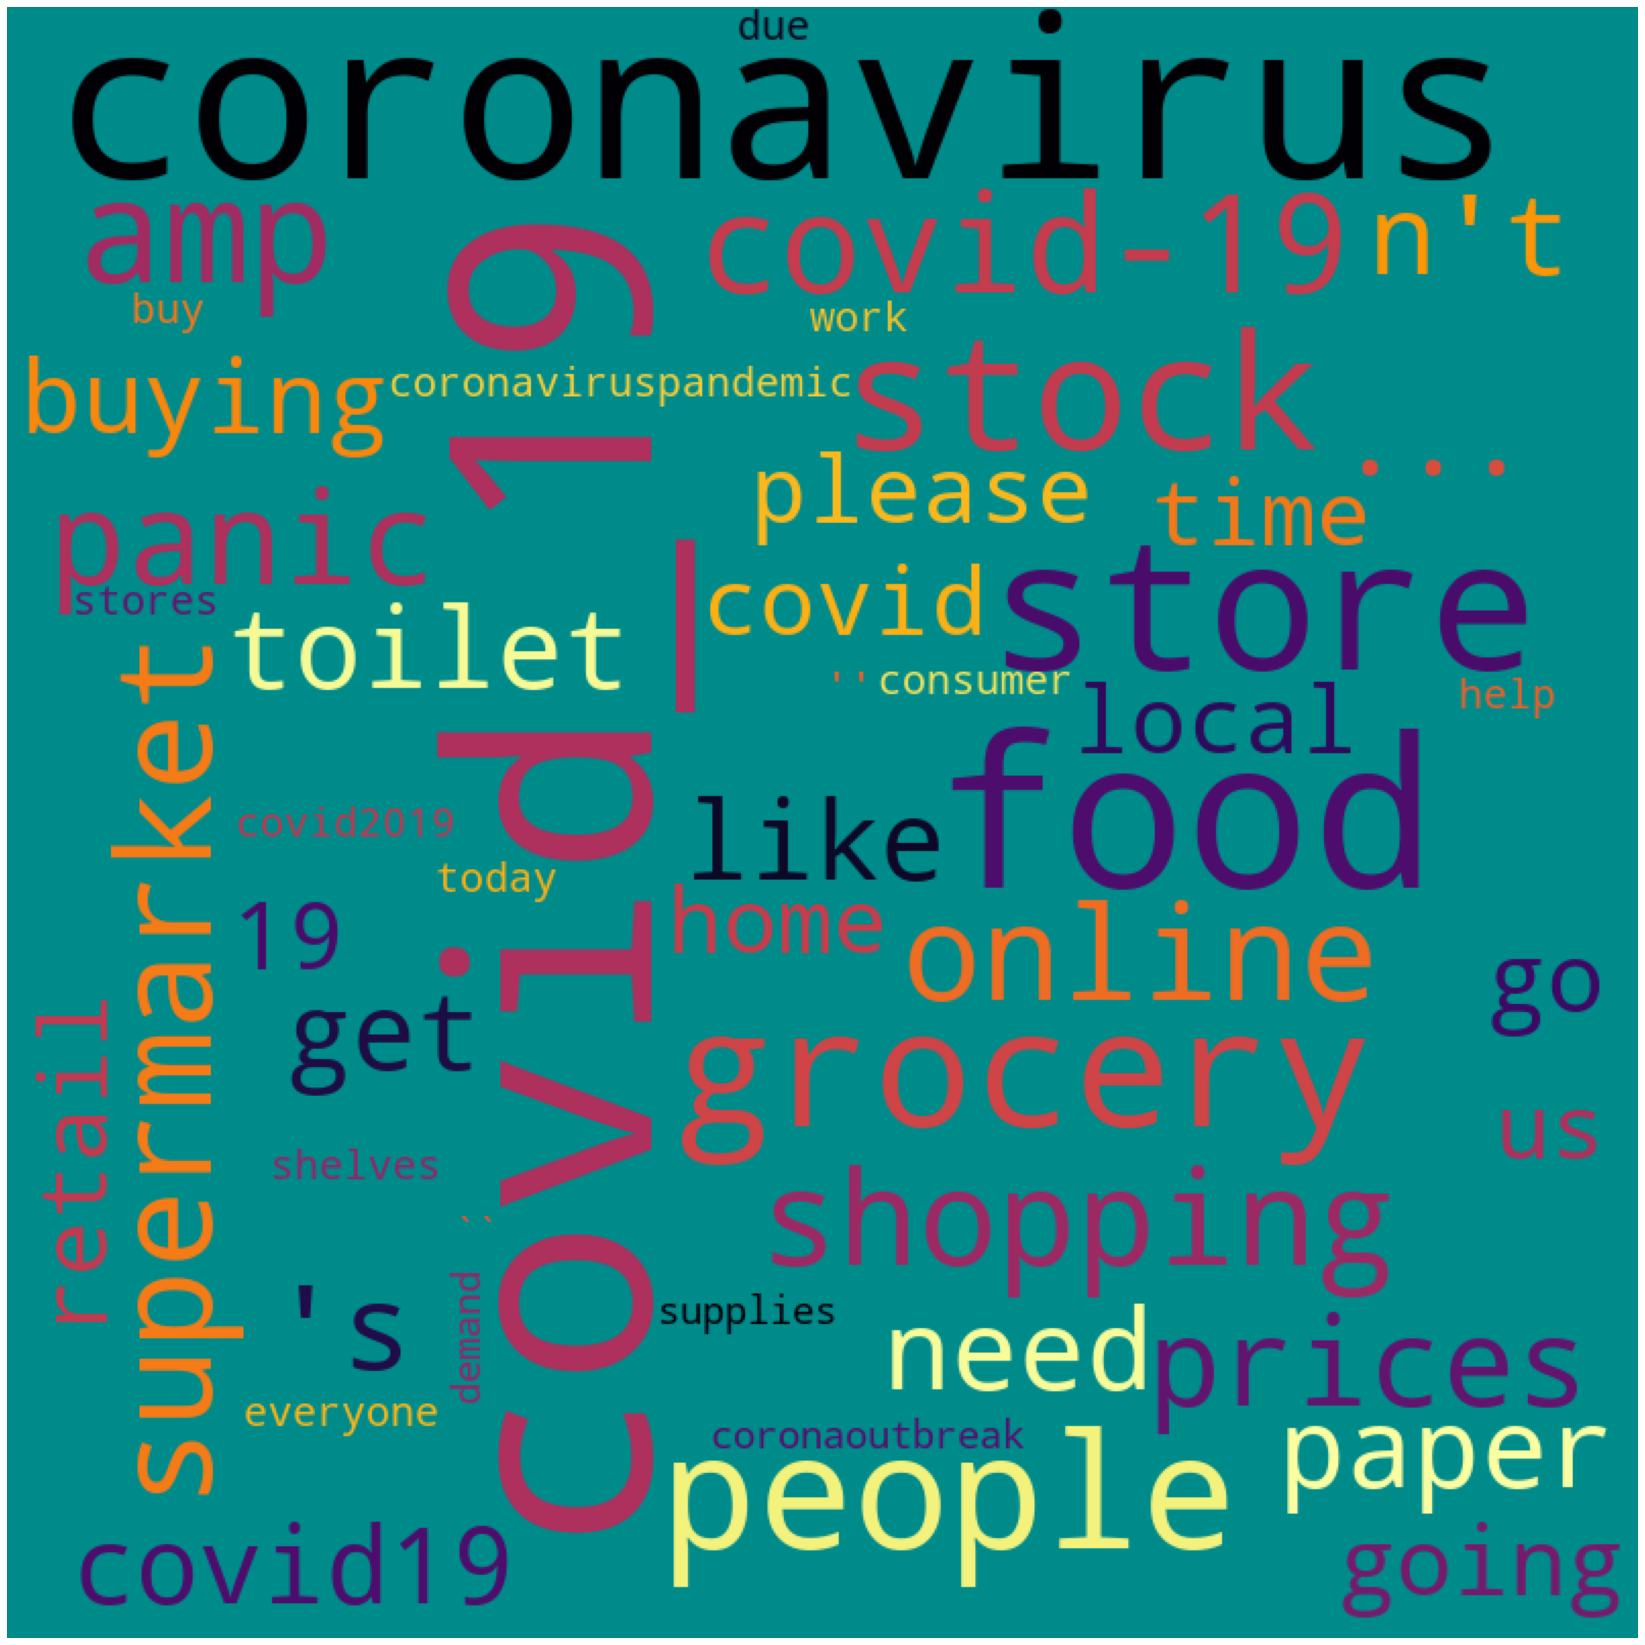

In [93]:
def plot_cloud(wordcloud):  
    # Set figure size  
    plt.figure(figsize=(40, 30))  
    # Display image  
    plt.imshow(wordcloud)   
    # No axis details  
    plt.axis("off")
    
wordcloud = WordCloud(width=800, height=800, background_color='#008B8B', colormap='inferno', max_words=50, stopwords = stop_words).generate_from_frequencies(word_freq)
plot_cloud(wordcloud)  